<a href="https://colab.research.google.com/github/eeuuais/studypolio/blob/main/AutoML/(pycaret)Multiclass_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 🌼 procedure

Getting Data ▶ Setting up Environment ▶ Create Model ▶ Tune Model 
▶ Plot Model ▶ Finalize Model ▶ Predict Model ▶ Save / Load Model

## **1.1 Installing PyCaret**

In [ ]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.2/320.2 KB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 44.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.7/16.7 MB 65.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.8/25.8 MB 47.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 662.4/662.4 KB 39.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 66.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 75.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.1/167.1 KB 19.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 82.2 MB/s eta 0:00:00
  

💹 (Colab 환경에서의 설정)

In [ ]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


## **4.0 Dataset for the Tutorial**
Dataset : Iris Dataset from UCI.
붓꽃의 3가지 종(setosa, versicolor, virginica)에 대해 꽃받침(sepal)과 꽃잎(petal)의 길이를 정리한 데이터.

---


[Columns]
- sepal_length: Length of Sepal
- sepal_width: Width of Sepal
- petal_length: Length of Petal
- petal_width: Width of Petal
- species: One of three class (Setosa, Versicolour, Virginica) ▶ Target Column

## **5.0 Getting the Data**

In [ ]:
from pycaret.datasets import get_data
dataset = get_data('iris')

sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

In [ ]:
#check the shape of data
dataset.shape

(150, 5)

- unseen data에 대한 predict_model() 함수를 시연하기 위해 원본 dataset에서 15개의 레코드 샘플 분할

In [ ]:
data = dataset.sample(frac=0.9, random_state=786)
data_unseen = dataset.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (135, 5)
Unseen Data For Predictions: (15, 5)


## * set up() 실행
pycaret을 사용하기 위한 data setting

  * data : 사용할 데이터 입력
  * target : data에서 어떤 데이터를 target으로 할 지 입력
  * session_id: 호출할 때마다 동일한 학습/테스트용 데이터 세트를 생성하기 위해 주어지는 난수 값 (random_state같은)



---
* 그 외 set up Environment

  * train_size : train_test_split과 동일하다고 생각하시면 됩니다. train_size만큼 학습하고, 나머지는 validation data로 사용합니다.

  * sample_estimator : 어떤 모델로 예측해 볼 것인지를 입력합니다. 입력하지 않으면 Logistic Regression Model이 자동으로 사용됩니다. 이 sample_estimator를 통해서 다양한 것들을 예측하는데, 대표적으로 train_size를 몇으로 사용할지를 정할 수 있습니다.

  * categorical_features : 범주형 변수를 여기에 입력할 수 있습니다.

  * silent : True로 설정하면, 입력된 데이터의 형태에 따라서 알아서 데이터를 조정합니다.

  * remove_perfect_collinearity : True로 설정하면 상관관계가 1인 피쳐를 삭제합니다.

  * fix_imbalance : True로 설정하면 SMOTE를 적용합니다. SMOTE는 클래스가 적은 데이터의 표본을 임의의 값으로 변형해 데이터를 추가하는 방법입니다.

  * fix_imbalance_method : imblearn에서 제공하는 다양한 모듈을 적용할 수 있습니다.

  * data_split_shuffle : False로 설정하면 데이터 split을 할 때 shuffle하는 것을 막습니다.

  * folds_shuffle : False로 설정하면 cross-validation을 할 때 shuffle하는 것을 막습니다.

  * n_jobs : 몇개의 processor를 이용할지 입력할 수 있습니다.

  * log_experiment : True로 설정하면 로그를 MLFlow 서버에 기록합니다.

  * experiment_name : 로그를 기록할 때 사용할 이름입니다.

  * log_plots : True로 설정하면 MLFlow에 정확한 plot이 기록됩니다.

  * log_profile : True로 설정하면 html파일이 MLFlow에 저장됩니다.

  * log_data : True로 설정하면 train, test 데이터가 csv파일로 저장됩니다.

  * verbose : True로 설정하면 진행중인 상황이 나타납니다.

(출처 https://dacon.io/codeshare/2428)


In [ ]:
from pycaret.classification import *
exp_mclf101 = setup(data = data, target = 'species', session_id=123) 

ImportError: ignored

→ error : 아래와 같이 numba 라이브러리를 업그레이드해줌으로써 해결


In [ ]:
pip install numba --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 45.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.6/34.6 MB 12.1 MB/s eta 0:00:00
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.37.0
    Uninstalling llvmlite-0.37.0:
      Successfully uninstalled llvmlite-0.37.0
  Attempting uninstall: numba
    Found existing installation: numba 0.54.1
    Uninstalling numba-0.54.1:
      Successfully uninstalled numba-0.54.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pycaret 2.3.10 requires numba<0.55, but you have numba 0.56.4 which is incompatible.


* 자동으로 모든 변수의 데이터 타입 추론. 결측치 확인


In [ ]:
from pycaret.classification import *
exp_mclf101 = setup(data = data, target = 'species', session_id=123) 

Description  \
0                               session_id   
1                                   Target   
2                              Target Type   
3                            Label Encoded   
4                            Original Data   
5                           Missing Values   
6                         Numeric Features   
7                     Categorical Features   
8                         Ordinal Features   
9                High Cardinality Features   
10                 High Cardinality Method   
11                   Transformed Train Set   
12                    Transformed Test Set   
13                      Shuffle Train-Test   
14                     Stratify Train-Test   
15                          Fold Generator   
16                             Fold Number   
17                                CPU Jobs   
18                                 Use GPU   
19                          Log Experiment   
20                         Experiment Name   
21                                     USI   
22                         Imputation Type   
23          Iterative Imputation Iteration   
24                         Numeric Imputer   
25      Iterative Imputation Numeric Model   
26                     Categorical Imputer   
27  Iterative Imputation Categorical Model   
28           Unknown Categoricals Handling   
29                               Normalize   
30                        Normalize Method   
31                          Transformation   
32                   Transformation Method   
33                                     PCA   
34                              PCA Method   
35                          PCA Components   
36                     Ignore Low Variance   
37                     Combine Rare Levels   
38                    Rare Level Threshold   
39                         Numeric Binning   
40                         Remove Outliers   
41                      Outliers Threshold   
42                Remove Multicollinearity   
43             Multicollinearity Threshold   
44             Remove Perfect Collinearity   
45                              Clustering   
46                    Clustering Iteration   
47                     Polynomial Features   
48                       Polynomial Degree   
49                    Trignometry Features   
50                    Polynomial Threshold   
51                          Group Features   
52                       Feature Selection   
53                Feature Selection Method   
54            Features Selection Threshold   
55                     Feature Interaction   
56                           Feature Ratio   
57                   Interaction Threshold   
58                           Fix Imbalance   
59                    Fix Imbalance Method   

                                                Value  
0                                                 123  
1                                             species  
2                                          Multiclass  
3   Iris-setosa: 0, Iris-versicolor: 1, Iris-virgi...  
4                                            (135, 5)  
5                                               False  
6                                                   4  
7                                                   0  
8                                               False  
9                                               False  
10                                               None  
11                                            (94, 4)  
12                                            (41, 4)  
13                                               True  
14                                              False  
15                                    StratifiedKFold  
16                                                 10  
17                                                 -1  
18                                              False  
19                                              False  
20                                   clf-default

INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='species',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_stra...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluste

## **7.0 Comparing All Models**
- 다양한 모델을 다양한 평가지표를 이용해 비교 가능
- 성능 비교에 사용되는 지표 및 걸리는 시간까지 제공
- 'ransac' (Random Sample Consensus) 활용해 아웃라이어 제거 가능
  - best = compare_models(exclude = ['ransac']) 


---
 - 분류문제의 경우: accuracy, AUC, Recall, Precision, F1, Kappa, MCC value 제공
 - 회귀문제의 경우: MAE, MSE, RSME, R2, RMSEL, MAPE value가 제공
 - 각 모델을 비교하여 프로세스 시간(TT sec)과 함께 출력
 - 비교 기준 변경 가능
  - compare_models(sort = 'Recall')
 - 모델 갯수 조정이 가능 (모델 수를 줄이면 training run time을 감소시킬 수 있다)
  - compare_models(fold = 5)
 - top n 모델을 반환
  - n_select = n




In [ ]:
# defalut : Accuracy 
best = compare_models()

Model  Accuracy     AUC  Recall   Prec.  \
lda          Linear Discriminant Analysis    0.9678  0.9963  0.9667  0.9758   
nb                            Naive Bayes    0.9578  0.9897  0.9556  0.9713   
qda       Quadratic Discriminant Analysis    0.9567  1.0000  0.9556  0.9708   
lr                    Logistic Regression    0.9478  0.9963  0.9444  0.9638   
knn                K Neighbors Classifier    0.9467  0.9926  0.9444  0.9630   
lightgbm  Light Gradient Boosting Machine    0.9456  0.9852  0.9444  0.9625   
ada                  Ada Boost Classifier    0.9256  0.9809  0.9222  0.9505   
gbc          Gradient Boosting Classifier    0.9256  0.9815  0.9222  0.9505   
et                 Extra Trees Classifier    0.9256  0.9926  0.9222  0.9505   
dt               Decision Tree Classifier    0.9144  0.9369  0.9111  0.9366   
rf               Random Forest Classifier    0.9144  0.9852  0.9111  0.9305   
svm                   SVM - Linear Kernel    0.8522  0.0000  0.8361  0.8261   
ridge                    Ridge Classifier    0.8300  0.0000  0.8222  0.8544   
dummy                    Dummy Classifier    0.3822  0.5000  0.3333  0.1480   

              F1   Kappa     MCC  TT (Sec)  
lda       0.9669  0.9515  0.9560     0.015  
nb        0.9546  0.9364  0.9442     0.014  
qda       0.9533  0.9348  0.9433     0.014  
lr        0.9444  0.9212  0.9304     0.357  
knn       0.9432  0.9197  0.9291     0.019  
lightgbm  0.9419  0.9182  0.9282     0.110  
ada       0.9194  0.8879  0.9026     0.092  
gbc       0.9194  0.8879  0.9026     0.304  
et        0.9194  0.8879  0.9026     0.172  
dt        0.9086  0.8712  0.8843     0.014  
rf        0.9101  0.8712  0.8813     0.207  
svm       0.8197  0.7755  0.8099     0.015  
ridge     0.8178  0.7433  0.7648     0.017  
dummy     0.2128  0.0000  0.0000     0.014

INFO:logs:create_model_container: 90
INFO:logs:master_model_container: 90
INFO:logs:display_container: 16
INFO:logs:LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)
INFO:logs:compare_models() succesfully completed......................................


In [ ]:
# Recall 기준 정렬
best2 = compare_models(sort = 'Recall')

Model  Accuracy     AUC  Recall   Prec.  \
lda          Linear Discriminant Analysis    0.9678  0.9963  0.9667  0.9758   
nb                            Naive Bayes    0.9578  0.9897  0.9556  0.9713   
qda       Quadratic Discriminant Analysis    0.9567  1.0000  0.9556  0.9708   
lr                    Logistic Regression    0.9478  0.9963  0.9444  0.9638   
knn                K Neighbors Classifier    0.9467  0.9926  0.9444  0.9630   
lightgbm  Light Gradient Boosting Machine    0.9456  0.9852  0.9444  0.9625   
ada                  Ada Boost Classifier    0.9256  0.9809  0.9222  0.9505   
gbc          Gradient Boosting Classifier    0.9256  0.9815  0.9222  0.9505   
et                 Extra Trees Classifier    0.9256  0.9926  0.9222  0.9505   
dt               Decision Tree Classifier    0.9144  0.9369  0.9111  0.9366   
rf               Random Forest Classifier    0.9144  0.9852  0.9111  0.9305   
svm                   SVM - Linear Kernel    0.8522  0.0000  0.8361  0.8261   
ridge                    Ridge Classifier    0.8300  0.0000  0.8222  0.8544   
dummy                    Dummy Classifier    0.3822  0.5000  0.3333  0.1480   

              F1   Kappa     MCC  TT (Sec)  
lda       0.9669  0.9515  0.9560     0.017  
nb        0.9546  0.9364  0.9442     0.014  
qda       0.9533  0.9348  0.9433     0.014  
lr        0.9444  0.9212  0.9304     0.049  
knn       0.9432  0.9197  0.9291     0.024  
lightgbm  0.9419  0.9182  0.9282     0.035  
ada       0.9194  0.8879  0.9026     0.088  
gbc       0.9194  0.8879  0.9026     0.195  
et        0.9194  0.8879  0.9026     0.180  
dt        0.9086  0.8712  0.8843     0.020  
rf        0.9101  0.8712  0.8813     0.223  
svm       0.8197  0.7755  0.8099     0.021  
ridge     0.8178  0.7433  0.7648     0.012  
dummy     0.2128  0.0000  0.0000     0.011

INFO:logs:create_model_container: 132
INFO:logs:master_model_container: 132
INFO:logs:display_container: 19
INFO:logs:LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)
INFO:logs:compare_models() succesfully completed......................................


## **8.0 Create a Model**
- PyCaret의 모델 라이브러리에는 18개의 분류기가 있으며, 본 튜토리얼에서는 아래 세 개 모델을 다룸
  - Decision Tree Classifier ('dt')
  - K Neighbors Classifier ('knn')
  - Logistic Regression ('lr')

- 디폴트로 10개의 fold를 생성 후 평가. 각종 평가지표의 평균과 표준편차를 모델 생성의 결과로 보여줌


## **8.1 Decision Tree Classifier**

In [ ]:
dt = create_model('dt')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
1       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
2       0.9000  0.9286  0.8889  0.9250  0.8971  0.8485  0.8616
3       0.8000  0.8571  0.7778  0.8800  0.7750  0.6970  0.7435
4       0.7778  0.8333  0.7778  0.7778  0.7778  0.6667  0.6667
5       0.7778  0.8333  0.7778  0.8667  0.7500  0.6667  0.7223
6       0.8889  0.9167  0.8889  0.9167  0.8857  0.8333  0.8492
7       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
8       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
9       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
Mean    0.9144  0.9369  0.9111  0.9366  0.9086  0.8712  0.8843
Std     0.0938  0.0694  0.0969  0.0734  0.1013  0.1410  0.1273

INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')
INFO:logs:create_model() succesfully completed......................................


In [ ]:
#trained model object is stored in the variable 'dt'. 
print(dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')


→ 사용된 모델 하이퍼 파라미터를 PRINT해서 확인 가능하다는 장점

## **8.2 K Neighbors Classifier**

In [ ]:
knn = create_model('knn')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
1       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
2       0.8000  1.0000  0.7778  0.8800  0.7750  0.6970  0.7435
3       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
4       0.8889  0.9630  0.8889  0.9167  0.8857  0.8333  0.8492
5       0.8889  0.9815  0.8889  0.9167  0.8857  0.8333  0.8492
6       0.8889  0.9815  0.8889  0.9167  0.8857  0.8333  0.8492
7       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
8       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
9       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
Mean    0.9467  0.9926  0.9444  0.9630  0.9432  0.9197  0.9291
Std     0.0697  0.0123  0.0745  0.0464  0.0759  0.1052  0.0915

INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 4
INFO:logs:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')
INFO:logs:create_model() succesfully completed......................................


## **8.3 Logistic Regression**

In [ ]:
lr = create_model('lr')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
1       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
2       0.9000  1.0000  0.8889  0.9250  0.8971  0.8485  0.8616
3       0.8000  1.0000  0.7778  0.8800  0.7750  0.6970  0.7435
4       0.8889  0.9630  0.8889  0.9167  0.8857  0.8333  0.8492
5       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
6       0.8889  1.0000  0.8889  0.9167  0.8857  0.8333  0.8492
7       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
8       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
9       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
Mean    0.9478  0.9963  0.9444  0.9638  0.9444  0.9212  0.9304
Std     0.0689  0.0111  0.0745  0.0456  0.0751  0.1041  0.0905

INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 5
INFO:logs:LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:create_model() succesfully completed......................................


## **9.0 Tune a Model**
 - 모델의 하이퍼파라미터를 자동으로 튜닝
 - 하이퍼파라미터 : 기계를 학습시켜주는 데에 필요한 파라미터
 - 하이퍼파라미터의 예시: 학습률, 손실함수, 미니배치 크기, 에포크 수 가중치 초기화, 히든 레이어 수, k-NN의 k 값 등
 - 즉, 사용자가 직접 세팅해야 하는 값들이 전부 다 하이퍼 파라미터라고 보면되고, 하이퍼파라미터는 문제마다 다르기 때문에 휴리스틱한 방법 (= 사용자의 감)에 의해서 많이 결정된다.

tune_model(estimator = None, fold = 10, round = 4, n_iter = 10, custom_grid = None, optimize = ‘Accuracy’, choose_better = False, verbose = True)


---


- estimator : 사용할 모델을 입력합니다.
- fold : K-fold의 수로, 최소 2 이상의 숫자를 입력합니다.
- round : 점수 반올림으로 표시할 자리를 적습니다.
- n_iter : Random Grid Search를 한 회차당 반복할 회수입니다.
- custom_grid : 직접 파라미터의 범위를 조정할 수 있습니다.
- optimize : 파라미터 튜닝 과정에서 어떤 점수를 따라갈 것인지 선택 가능합니다.
  - 'Accuracy', 'AUC', 'Recall', 'Precision', 'F1'
- choose_better : True로 설정하면 성능이 높아지지 않을 경우 tuning을 하지 않은 모델을 반환합니다.
- verbose : True로 설정하면 진행중인 상황이 나타납니다.

## **9.1 Decision Tree Classifier**

In [ ]:
tuned_dt = tune_model(dt)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
1       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
2       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
3       0.8000  0.9143  0.7778  0.8800  0.7750  0.6970  0.7435
4       0.8889  0.9444  0.8889  0.9167  0.8857  0.8333  0.8492
5       0.7778  0.8611  0.7778  0.7778  0.7778  0.6667  0.6667
6       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
7       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
8       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
9       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
Mean    0.9467  0.9720  0.9444  0.9574  0.9438  0.9197  0.9259
Std     0.0856  0.0468  0.0896  0.0725  0.0903  0.1289  0.1203

INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 6
INFO:logs:DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.2, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')
INFO:logs:tune_model() succesfully completed......................................


In [ ]:
#tuned model object is stored in the variable 'tuned_dt'. 
print(tuned_dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.2, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')


→ 튜닝에 사용된 모델 하이퍼 파라미터를 PRINT해서 확인 가능

어떤 하이퍼 파라미터 인자가 이 모델의 성능을 끌어올리는데 도움이 됐는지 설명 가능


* 튜닝 전과 튜닝 후 비교(dt)

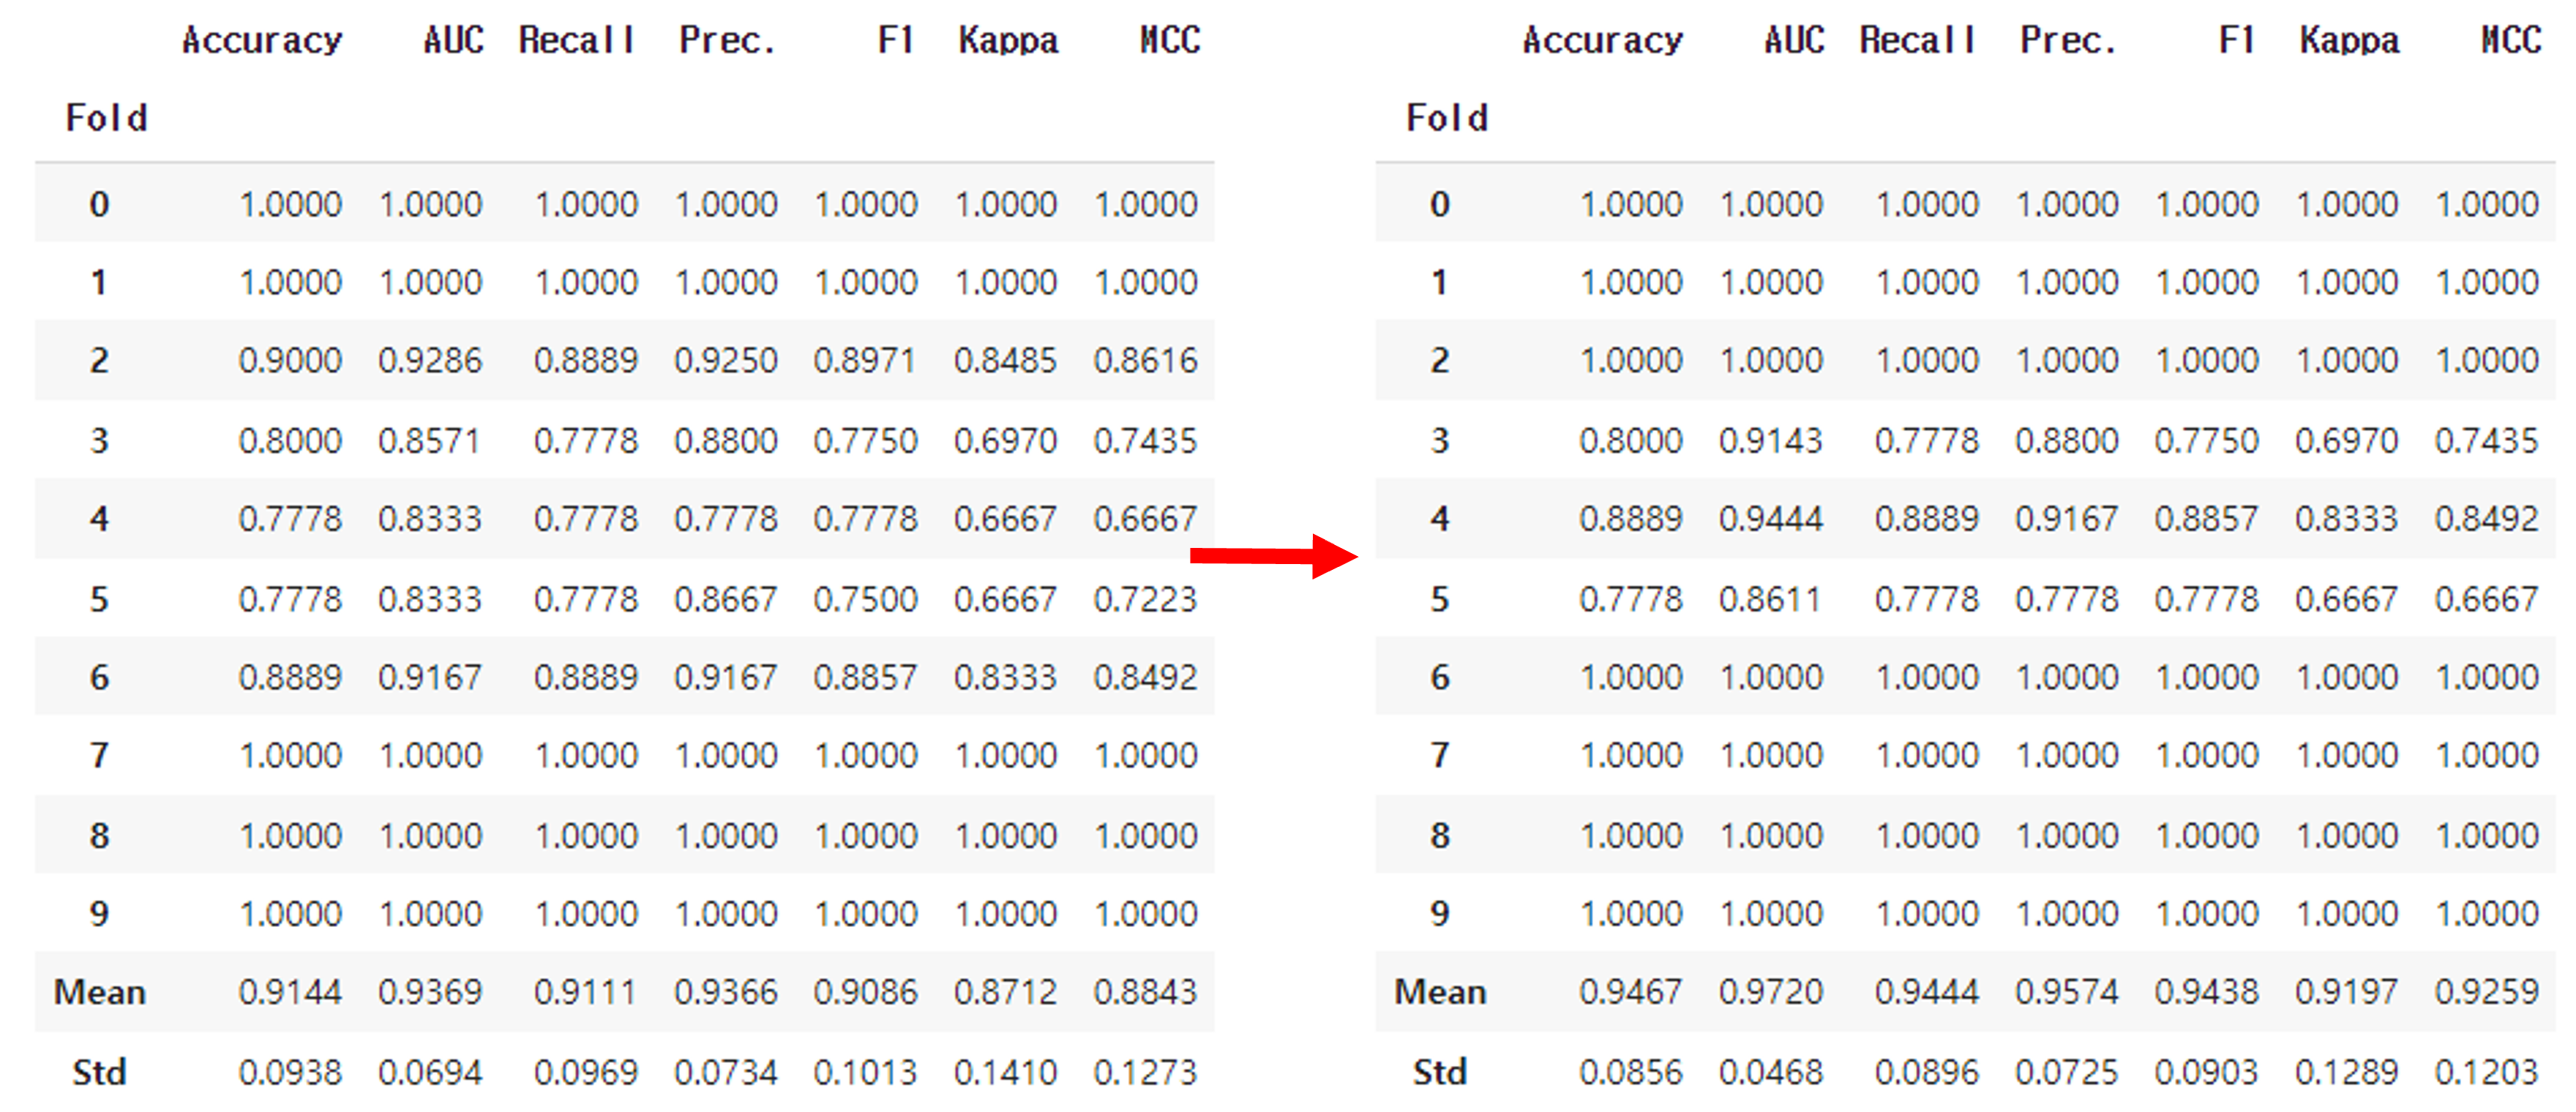

## **9.2 K Neighbors Classifier**
* custom_grid를 통해 파라미터의 범위를 조정하여 모델을 생성한 결과

In [ ]:
import numpy as np
tuned_knn = tune_model(knn, custom_grid = {'n_neighbors' : np.arange(0,50,1)})

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
1       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
2       0.8000  1.0000  0.7778  0.8800  0.7750  0.6970  0.7435
3       0.9000  0.9714  0.8889  0.9250  0.8971  0.8485  0.8616
4       0.8889  0.9259  0.8889  0.9167  0.8857  0.8333  0.8492
5       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
6       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
7       0.8889  1.0000  0.8889  0.9167  0.8857  0.8333  0.8492
8       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
9       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
Mean    0.9478  0.9897  0.9444  0.9638  0.9444  0.9212  0.9304
Std     0.0689  0.0229  0.0745  0.0456  0.0751  0.1041  0.0905

INFO:logs:create_model_container: 19
INFO:logs:master_model_container: 19
INFO:logs:display_container: 7
INFO:logs:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=33, p=2,
                     weights='uniform')
INFO:logs:tune_model() succesfully completed......................................


## **9.3 Logistic Regression**

In [ ]:
tuned_lr = tune_model(lr)

Accuracy  AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                       
0       1.0000  1.0  1.0000  1.0000  1.0000  1.0000  1.0000
1       1.0000  1.0  1.0000  1.0000  1.0000  1.0000  1.0000
2       0.9000  1.0  0.8889  0.9250  0.8971  0.8485  0.8616
3       0.8000  1.0  0.7778  0.8800  0.7750  0.6970  0.7435
4       0.8889  1.0  0.8889  0.9167  0.8857  0.8333  0.8492
5       1.0000  1.0  1.0000  1.0000  1.0000  1.0000  1.0000
6       0.8889  1.0  0.8889  0.9167  0.8857  0.8333  0.8492
7       1.0000  1.0  1.0000  1.0000  1.0000  1.0000  1.0000
8       1.0000  1.0  1.0000  1.0000  1.0000  1.0000  1.0000
9       1.0000  1.0  1.0000  1.0000  1.0000  1.0000  1.0000
Mean    0.9478  1.0  0.9444  0.9638  0.9444  0.9212  0.9304
Std     0.0689  0.0  0.0745  0.0456  0.0751  0.1041  0.0905

INFO:logs:create_model_container: 20
INFO:logs:master_model_container: 20
INFO:logs:display_container: 8
INFO:logs:LogisticRegression(C=2.833, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


## **10.0 Plot a Model**
- plot_model() : 모델을 완성하기 전 AUC, confusion_matrix, decision boundary 등과 같은 다양한 측면에서 성능을 분석 가능
- 훈련된 모델 객체를 가져와 test/hold out 세트를 기반으로 플롯을 반환
- 15개 종류의 plot

- 본 튜토리얼에서는 튜닝된 knn 모델을 가지고 3개 plot을 출력해 봄

## **10.1 Confusion Matrix**

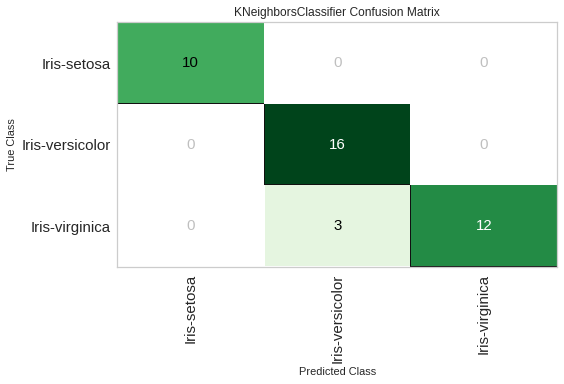

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(tuned_knn, plot = 'confusion_matrix')

## **10.2 Classification Report**

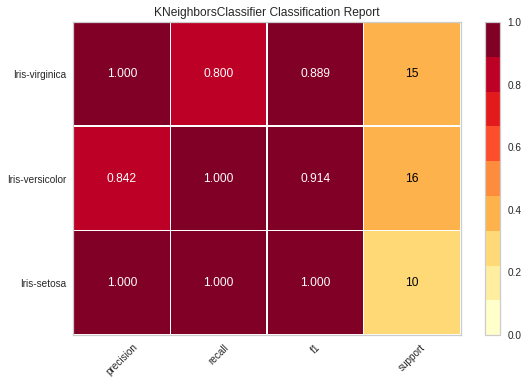

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(tuned_knn, plot = 'class_report')

## **10.3 Decision Boundary Plot**

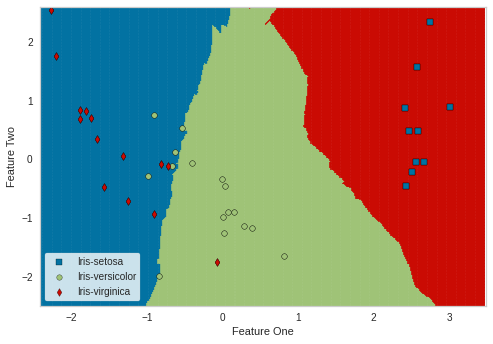

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(tuned_knn, plot='boundary')

## **10.4 Prediction Error Plot**

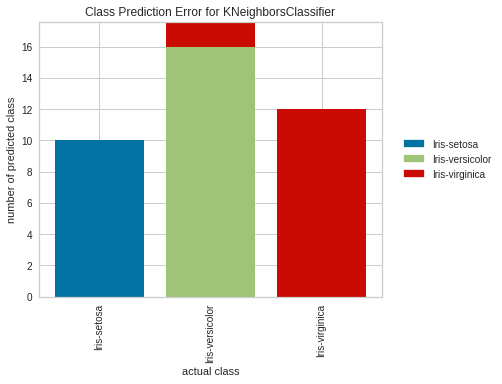

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(tuned_knn, plot = 'error')

## evaluate_model()
- 모델 튜닝 후 모델이 잘 만들어졌는지 분석
- 분류, 회귀 등을 위한 다양한 시각화 도구와 커스터마이징 속성 제공

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=33, p=2,
                     weights='uniform'), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

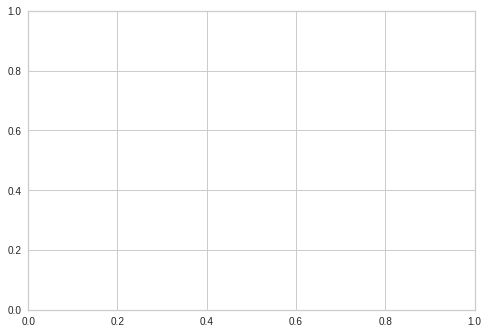

In [ ]:
evaluate_model(tuned_knn)

## **11.0 Predict on test / hold-out Sample**
- 위에서 본 모든 평가 지표는 훈련 세트(70%)만을 기준으로 교차 검증된 결과
- tuned_knn 변수에 저장된 최종 학습 모델을 사용하여 홀드아웃 샘플에 대해 예측

→ Accuracy 0.9268 로 train dataset에 대한 정확도(0.9478)와 큰 차이 없음

In [ ]:
predict_model(tuned_knn);

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=33, p=2,
                     weights='uniform'), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


Model  Accuracy     AUC  Recall   Prec.      F1   Kappa  \
0  K Neighbors Classifier    0.9268  0.9761  0.9333  0.9384  0.9259  0.8879   

      MCC  
0  0.8953

## **12.0 Finalize Model for Deployment**
- 생성한 모델을 최종적으로 사용할 모델로 변환

In [ ]:
final_knn = finalize_model(tuned_knn)

INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=33, p=2,
                     weights='uniform'), fit_kwargs=None, groups=None, model_only=True, display=None, experiment_custom_tags=None, return_train_score=False)
INFO:logs:Finalizing KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=33, p=2,
                     weights='uniform')
INFO:logs:Initializing create_model()
INFO:logs:create_model(estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=33, p=2,
                     weights='uniform'), fold=None, round=4, cross_validation=True, predict=True, fit_kwargs={}, groups=None, refit=True, verbose=False, system=False, metrics=None, experiment_custom

In [ ]:
#Final K Nearest Neighbour parameters for deployment
print(final_knn)du print(final_knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=33, p=2,
                     weights='uniform')


## **13.0 Predict on unseen data**
- predict_model() 함수로 unseen data set를 예측할 수 있다.
- unseen데이터에는 첫 단계에서 원래 데이터 세트에서 따로 분할한 15개 샘플이 포함되어있다.
- label은 예측된 결과이고, score는 예측 확률입니다. 

In [ ]:
unseen_predictions = predict_model(final_knn, data=data_unseen)
unseen_predictions.head()

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=33, p=2,
                     weights='uniform'), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


Model  Accuracy  AUC  Recall  Prec.  F1  Kappa  MCC
0  K Neighbors Classifier       0.0  1.0       0      0   0      0    0

sepal_length  sepal_width  petal_length  petal_width          species  \
0           5.4          3.9           1.7          0.4      Iris-setosa   
1           5.4          3.4           1.7          0.2      Iris-setosa   
2           5.1          3.3           1.7          0.5      Iris-setosa   
3           4.8          3.1           1.6          0.2      Iris-setosa   
4           6.9          3.1           4.9          1.5  Iris-versicolor   

             Label   Score  
0      Iris-setosa  1.0000  
1      Iris-setosa  1.0000  
2      Iris-setosa  1.0000  
3      Iris-setosa  1.0000  
4  Iris-versicolor  0.5455

## **14.0 Saving the model**

- final_knn에 저장된 모델을 사용하여 data_unseen을 예측 완료.
- PyCaret의 내장 함수 save_model()로 모델을 저장하여 예측할 새로운 데이터가 있다면 전체 과정을 다시 거치지 않도록 한다.

In [ ]:
save_model(final_knn,'Final KNN Model 08Feb2020')

INFO:logs:Initializing save_model()
INFO:logs:save_model(model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=33, p=2,
                     weights='uniform'), model_name=Final KNN Model 08Feb2020, prep_pipe_=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='species',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                nume

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='species',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_stra...
                 ('fix_perfect', Remove_100(target='species')),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
        

## **15.0 Loading the saved model**
* PyCaret의 load_model() 함수로 새로운 데이터에 적용

In [ ]:
saved_final_knn = load_model('Final KNN Model 08Feb2020')

INFO:logs:Initializing load_model()
INFO:logs:load_model(model_name=Final KNN Model 08Feb2020, platform=None, authentication=None, verbose=True)


Transformation Pipeline and Model Successfully Loaded


In [ ]:
new_prediction = predict_model(saved_final_knn, data=data_unseen)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='species',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_stra...
                ('fix_perfect', Remove_100(target='species')),
                ('clean_names', Clean_Colum_Names()),
                ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                

Model  Accuracy  AUC  Recall  Prec.  F1  Kappa  MCC
0  K Neighbors Classifier       0.0  1.0       0      0   0      0    0

In [ ]:
new_prediction.head()

sepal_length  sepal_width  petal_length  petal_width          species  \
0           5.4          3.9           1.7          0.4      Iris-setosa   
1           5.4          3.4           1.7          0.2      Iris-setosa   
2           5.1          3.3           1.7          0.5      Iris-setosa   
3           4.8          3.1           1.6          0.2      Iris-setosa   
4           6.9          3.1           4.9          1.5  Iris-versicolor   

             Label   Score  
0      Iris-setosa  1.0000  
1      Iris-setosa  1.0000  
2      Iris-setosa  1.0000  
3      Iris-setosa  1.0000  
4  Iris-versicolor  0.5455